In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from results_GGO import *

In [4]:
data_lung = {
    "healthy_model": [1.080476, 0.122971, 0.734845, 0.924558, 0.015409, 0.503406, 0.150070, 2.683077, 1.648927, 1.707920, None, None, None],
    "healthy_GT": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, None, None, None],
    "sick_model": [0.889374, 0.297673, 0.085086, 0.549949, 2.764871, 1.469894, 2.585738, 2.333490, 3.351203, 1.492813, 2.329664, 2.721988, 0.534492],
    "sick_GT": [0.007435, 0.049480, 1.654593, 0.346879, 1.657888, 2.721025, 0.905012, 10.046798, 3.890992, 0.694731, 0.242964, 0.132046, 0.032998],
}

df = pd.DataFrame(data_lung)


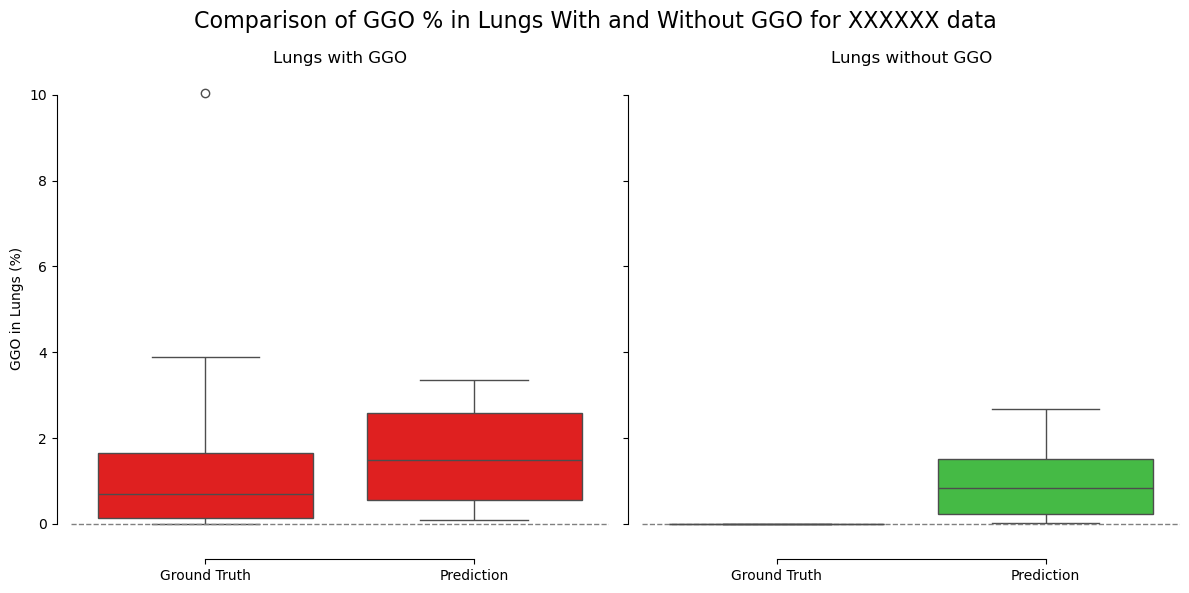

In [5]:
# Setting up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Sick plot
sns.boxplot(
    data=df[["sick_GT", "sick_model"]],
    ax=axes[0],
    palette=["red", "red"]  # Specify colors for each box
)
axes[0].set_title("Lungs with GGO")
axes[0].set_ylabel("GGO in Lungs (%)")
axes[0].axhline(y=0, color='gray', linestyle='--', linewidth=1)
axes[0].set_xticks([0, 1])  # Explicitly set tick positions
axes[0].set_xticklabels(["Ground Truth", "Prediction"])  # Assign labels
sns.despine(ax=axes[0], offset=10, trim=True)

# Healthy plot
sns.boxplot(
    data=df[["healthy_GT", "healthy_model"]],
    ax=axes[1],
    palette=["limegreen", "limegreen"]  # Specify colors for each box
)
axes[1].set_title("Lungs without GGO")
axes[1].set_ylabel("GGO in Lungs (%)")
axes[1].axhline(y=0, color='gray', linestyle='--', linewidth=1)
axes[1].set_xticks([0, 1])  # Explicitly set tick positions
axes[1].set_xticklabels(["Ground Truth", "Prediction"])  # Assign labels
sns.despine(ax=axes[1], offset=10, trim=True)

# Final adjustments
fig.suptitle("Comparison of GGO % in Lungs With and Without GGO for XXXXXX data", fontsize=16)
plt.tight_layout()
plt.savefig("boxplots_subplots.png")
plt.show()


### Broken Slanted y-axis for better visibility

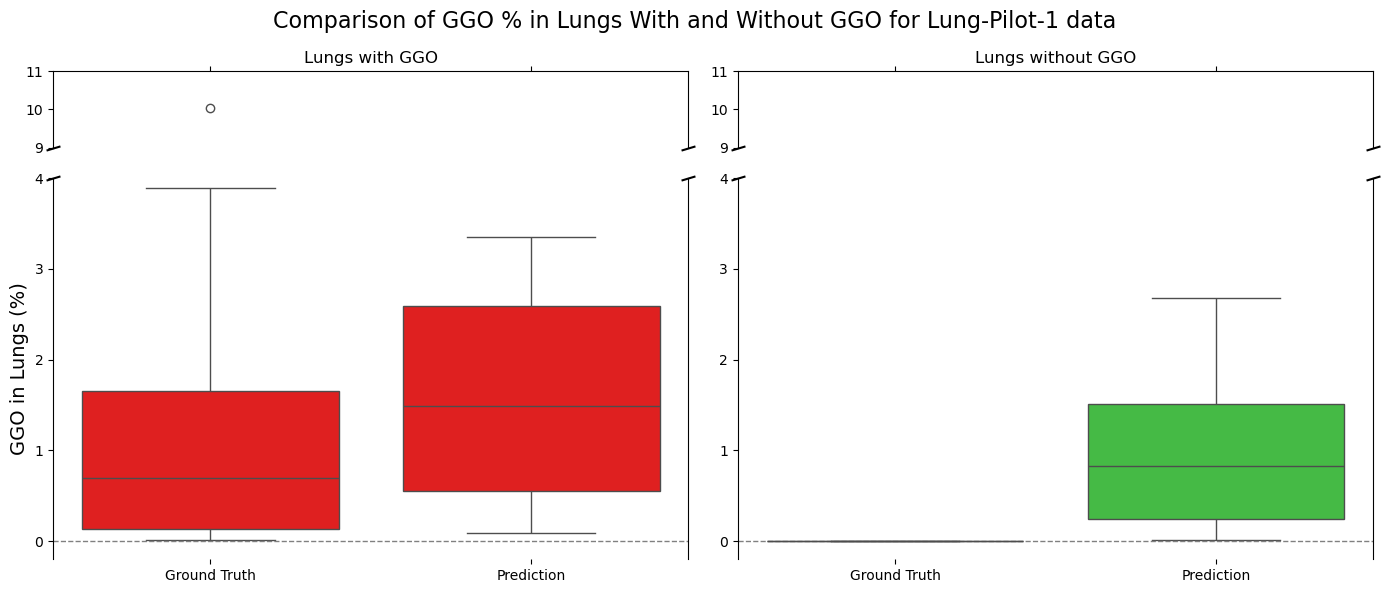

In [21]:
# Set up the figure with adjusted width and height ratios
fig, ((ax1_top, ax2_top), (ax1_bottom, ax2_bottom)) = plt.subplots(
    2, 2, figsize=(14, 6), sharex=False, gridspec_kw={'height_ratios': [0.2, 1]}
)
fig.subplots_adjust(hspace=0.01, wspace=0.1)  # Reduced spacing

# Broken y-axis effect with slanted cuts
d = 0.3  # proportion of vertical to horizontal extent of the slanted line
kwargs_slanted = dict(marker=[(-1, -d), (1, d)], markersize=10, 
                      linestyle="none", color='k', mec='k', mew=1.5, clip_on=False)

# Consistent axis limits for both subplots
top_ylim = (9, 11)  # Top zoom
bottom_ylim = (-0.2, 4)  # Bottom zoom

# Plot for Sick Lungs (Top and Bottom)
sns.boxplot(data=df[["sick_GT", "sick_model"]], ax=ax1_top, palette=["red", "red"])
sns.boxplot(data=df[["sick_GT", "sick_model"]], ax=ax1_bottom, palette=["red", "red"])
ax1_top.set_ylim(*top_ylim)
ax1_bottom.set_ylim(*bottom_ylim)
ax1_top.set_yticks([9, 10, 11])  # Simplify ticks for outliers
ax1_bottom.set_yticks(range(0, 5))  # Keep bottom ticks integer
ax1_top.spines.bottom.set_visible(False)
ax1_bottom.spines.top.set_visible(False)
ax1_top.xaxis.tick_top()
ax1_top.tick_params(labeltop=False)
ax1_bottom.xaxis.tick_bottom()

# Add slanted lines for ax1 (Sick Lungs)
ax1_top.plot([0, 1], [0, 0], transform=ax1_top.transAxes, **kwargs_slanted)
ax1_bottom.plot([0, 1], [1, 1], transform=ax1_bottom.transAxes, **kwargs_slanted)

# Plot for Healthy Lungs (Top and Bottom)
sns.boxplot(data=df[["healthy_GT", "healthy_model"]], ax=ax2_top, palette=["limegreen", "limegreen"])
sns.boxplot(data=df[["healthy_GT", "healthy_model"]], ax=ax2_bottom, palette=["limegreen", "limegreen"])
ax2_top.set_ylim(*top_ylim)
ax2_bottom.set_ylim(*bottom_ylim)
ax2_top.set_yticks([9, 10, 11])  # Simplify ticks for outliers
ax2_bottom.set_yticks(range(0, 5))  # Keep bottom ticks integer
ax2_top.spines.bottom.set_visible(False)
ax2_bottom.spines.top.set_visible(False)
ax2_top.xaxis.tick_top()
ax2_top.tick_params(labeltop=False)
ax2_bottom.xaxis.tick_bottom()

# Add slanted lines for ax2 (Healthy Lungs)
ax2_top.plot([0, 1], [0, 0], transform=ax2_top.transAxes, **kwargs_slanted)
ax2_bottom.plot([0, 1], [1, 1], transform=ax2_bottom.transAxes, **kwargs_slanted)

# Turn off the outer x-axis line for the bottom plots
for ax in [ax1_bottom, ax2_bottom]:
    ax.spines['bottom'].set_visible(False)  # Hide the bottom spine
    ax.axhline(y=0, color="gray", linestyle="--", linewidth=1)  # Add dashed x-axis

# Final labeling and titles
ax1_top.set_title("Lungs with GGO")
ax2_top.set_title("Lungs without GGO")
ax1_bottom.set_xticks([0, 1])
ax1_bottom.set_xticklabels(["Ground Truth", "Prediction"])
ax2_bottom.set_xticks([0, 1])
ax2_bottom.set_xticklabels(["Ground Truth", "Prediction"])
fig.suptitle("Comparison of GGO % in Lungs With and Without GGO for Lung-Pilot-1 data", fontsize=16)
ax1_bottom.set_ylabel("GGO in Lungs (%)", fontsize=14)

plt.tight_layout()
plt.show()